### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.15.0'

### Collect Data
We will use MNIST dataset for this exercise. This dataset contains images of hand written numbers with each image being a black & white picture of size 28x28. We will download the data using tensorflow API. The dataset has 60,000 training examples and 10,000 test examples. Please note that images have already been converted to numpy arrays.

In [3]:
#Download dataset
(trainX, trainY),(testX, testY) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
#Check number of training examples and size of each example
trainX.shape

(60000, 28, 28)

In [5]:
#Check number of test examples and size of each example
testX.shape

(10000, 28, 28)

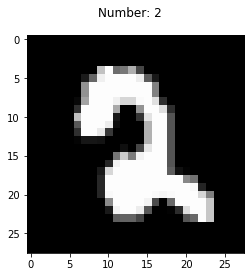

In [6]:
#Let's review the data
import matplotlib.pyplot as plt
import numpy as np
img_num = np.random.randint(0, testX.shape[0]) #Get a random integer between 0 and number of examples in test dataset
plt.imshow(testX[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(testY[img_num]))
plt.show()

### Convert Output label to multiple values

In [7]:
#Check current label size
testY[0]

7

In [0]:
#Convert labels to one hot encoding
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [9]:
#Now check the label size
trainY[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Build the Graph

In [0]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

### Apply Convolutional Layers, MaxPooling

In [0]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', strides=(2,2), padding='same'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

In [63]:
#Check model output at current stage
model.output

<tf.Tensor 'batch_normalization_2/cond/Merge:0' shape=(?, 13, 13, 64) dtype=float32>

### Add layers for Classification

In [0]:
#Add layer with 10 filters
model.add(tf.keras.layers.Conv2D(10, kernel_size=(1,1), activation='relu'))

In [65]:
#Check model output at current stage
model.output

<tf.Tensor 'conv2d_2/Relu:0' shape=(?, 13, 13, 10) dtype=float32>

In [0]:
#Use Global Average pooling layer to reduce number of outputs to 10
model.add(tf.keras.layers.GlobalAveragePooling2D())

In [67]:
#Check model output at current stage
model.output

<tf.Tensor 'global_average_pooling2d/Mean:0' shape=(?, 10) dtype=float32>

In [0]:
#Output layer
model.add(tf.keras.layers.Activation('softmax'))

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 10)        6

## Train the model

In [71]:
#Train the model
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 147us/sample - loss: 1.2106 - acc: 0.6546 - val_loss: 0.5893 - val_acc: 0.8685
Epoch 2/30
60000/60000 [==============================] - 8s 140us/sample - loss: 0.3849 - acc: 0.9107 - val_loss: 0.2547 - val_acc: 0.9389
Epoch 3/30
60000/60000 [==============================] - 8s 139us/sample - loss: 0.2432 - acc: 0.9385 - val_loss: 0.2321 - val_acc: 0.9350
Epoch 4/30
60000/60000 [==============================] - 8s 139us/sample - loss: 0.1942 - acc: 0.9488 - val_loss: 0.2187 - val_acc: 0.9373
Epoch 5/30
60000/60000 [==============================] - 8s 138us/sample - loss: 0.1676 - acc: 0.9544 - val_loss: 0.1975 - val_acc: 0.9411
Epoch 6/30
60000/60000 [==============================] - 8s 141us/sample - loss: 0.1485 - acc: 0.9582 - val_loss: 0.1586 - val_acc: 0.9502
Epoch 7/30
60000/60000 [==============================] - 8s 138us/sample - loss: 0.1362 - acc: 0.9606 - val_l

In [0]:
model.save('mnist_cnn_v1.h5')

In [0]:
!ls -l